# Heart Disease Classfication

About the data :
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
* restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment(Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: diagnosis of heart disease (angiographic disease status)
(Value 0: < 50% diameter narrowing, 
Value 1: > 50% diameter narrowing)(in any major vessel: attributes 59 through 68 are vessels)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [98]:
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, f1_score, recall_score

# EDA
1. What are we trying to achieve? (Goal)
2. Meta Deta
3. Handling Missing Values
4. Outlier Detection
5. Feature Selection

In [4]:
df = pd.read_csv("data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='target'>

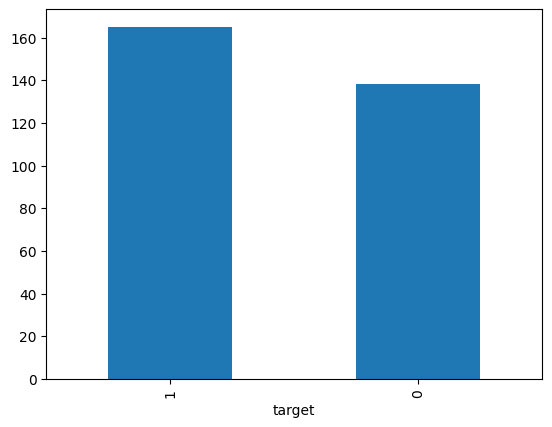

In [7]:
df["target"].value_counts().plot(kind="bar")

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Frequency acc. to Sex

<Axes: xlabel='sex'>

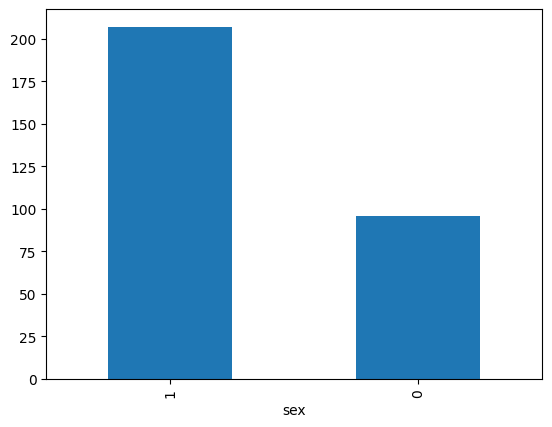

In [9]:
df["sex"].value_counts().plot(kind="bar")

In [10]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

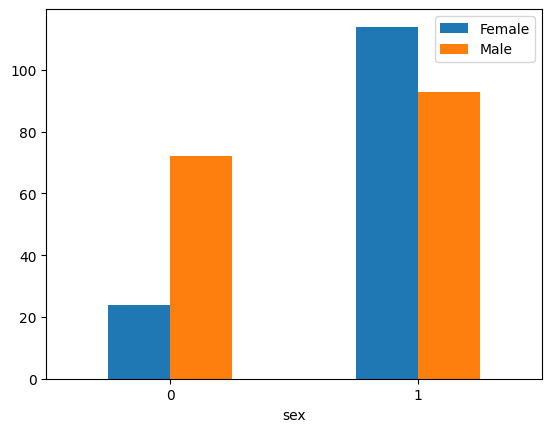

In [11]:
pd.crosstab(df.sex, df.target).plot(kind="bar")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0)

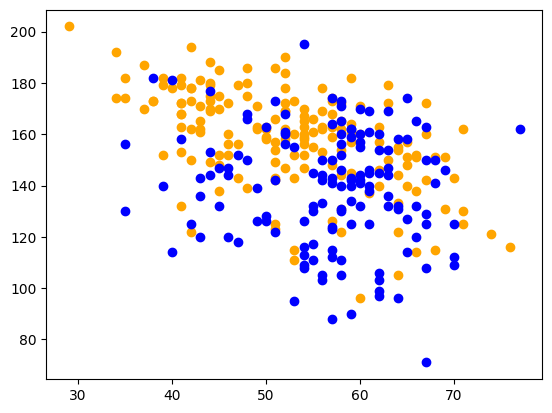

In [12]:
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], color = "orange")
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color = "blue")

<Axes: ylabel='Frequency'>

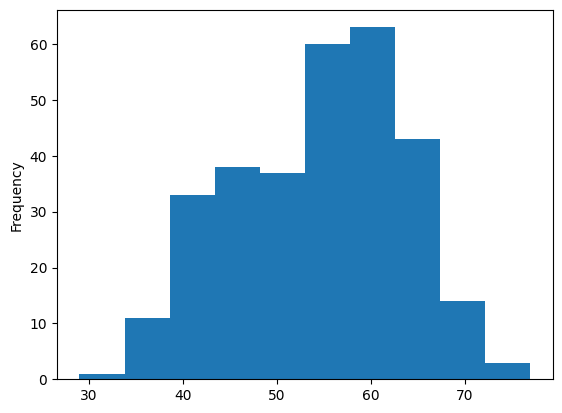

In [13]:
df.age.plot.hist()

In [14]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


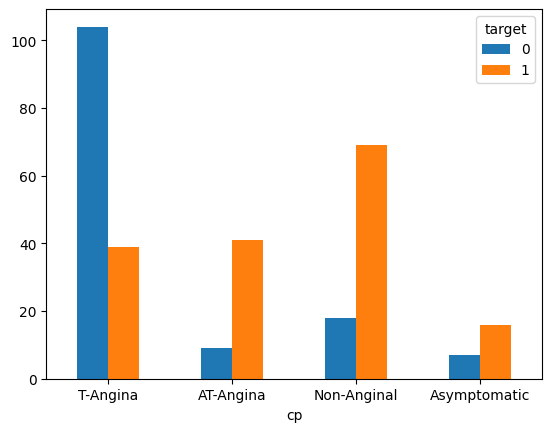

In [15]:
pd.crosstab(df.cp, df.target).plot.bar()
plt.xticks(range(0,4), labels=["T-Angina", "AT-Angina", "Non-Anginal", "Asymptomatic"], rotation = 0);

<Axes: >

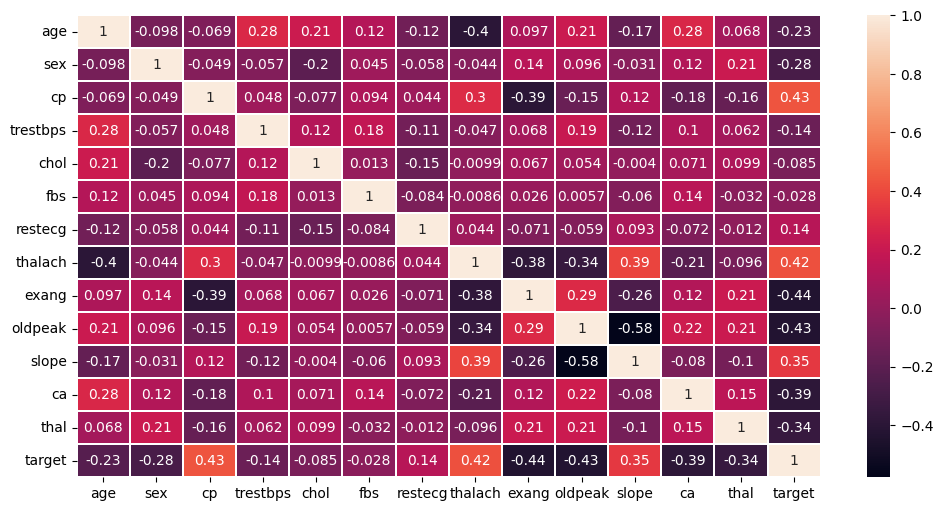

In [16]:
corr_m = df.corr()
plt.figure(figsize = (12, 6))
sns.heatmap(corr_m, annot=True, linewidths=0.2)

# Modelling

In [17]:
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

In [18]:
#train-test split
X = df.drop("target", axis=1)
y = df.target
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_tr.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [20]:
y_tr.head()

132    1
202    0
196    0
75     1
176    0
Name: target, dtype: int64

In [21]:
models = {"LogisticRegression" : lr_model,
          "RandomForestClassifier" : rf_model,
          "KNeighborsClassifier" : knn_model}

In [36]:
def fit_and_show_scores(models, X_tr, y_tr, X_te, y_te):
    scores = {}
    for modelname, model in models.items():
        model.fit(X_tr, y_tr)
        y_preds = model.predict(X_te)
        score = {"Accuracy" : model.score(X_te, y_te),
                  "Precision" : precision_score(y_pred = y_preds, y_true = y_te),
                  "F1 Score"  : f1_score(y_pred = y_preds, y_true = y_te),
                  "Recall"    : recall_score(y_pred = y_preds, y_true = y_te)}
        print(f"Accuracy  ({modelname}): {score['Accuracy']}")
        print(f"Precision ({modelname}): {score['Precision']}")
        print(f"F1 Score  ({modelname}): {score['F1 Score']}")
        print(f"Recall    ({modelname}): {score['Recall']}\n")
        scores[modelname] = score
    return scores

In [39]:
model_scores = fit_and_show_scores(models, X_tr, y_tr, X_te, y_te)

c:\Users\Shourya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy  (LogisticRegression): 0.8852459016393442
Precision (LogisticRegression): 0.8787878787878788
F1 Score  (LogisticRegression): 0.8923076923076922
Recall    (LogisticRegression): 0.90625

Accuracy  (RandomForestClassifier): 0.8524590163934426
Precision (RandomForestClassifier): 0.8484848484848485
F1 Score  (RandomForestClassifier): 0.8615384615384615
Recall    (RandomForestClassifier): 0.875

Accuracy  (KNeighborsClassifier): 0.6885245901639344
Precision (KNeighborsClassifier): 0.6857142857142857
F1 Score  (KNeighborsClassifier): 0.7164179104477612
Recall    (KNeighborsClassifier): 0.75



Text(777.1928104575164, 0.5, 'True Label')

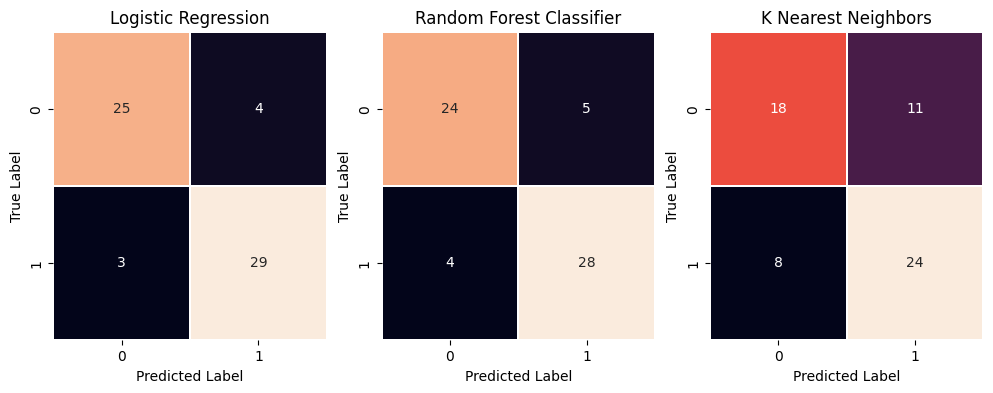

In [92]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_te, lr_model.predict(X_te))
cm_rf = confusion_matrix(y_te, rf_model.predict(X_te))
cm_knn = confusion_matrix(y_te, knn_model.predict(X_te))
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize = (12, 4))
sns.heatmap(cm_lr, annot=True, linewidths=0.2, cbar=False, ax=ax1)
ax1.title.set_text("Logistic Regression")
ax1.set_xlabel("Predicted Label")
ax1.set_ylabel("True Label")
sns.heatmap(cm_rf, annot=True, linewidths=0.2, cbar=False, ax = ax2)
ax2.title.set_text("Random Forest Classifier")
ax2.set_xlabel("Predicted Label")
ax2.set_ylabel("True Label")
sns.heatmap(cm_knn, annot=True, linewidths=0.2, cbar=False, ax =ax3)
ax3.title.set_text("K Nearest Neighbors")
ax3.set_xlabel("Predicted Label")
ax3.set_ylabel("True Label")

In [47]:
scores_df = pd.DataFrame(model_scores)
scores_df = scores_df.T
scores_df

,Accuracy,Precision,F1 Score,Recall
LogisticRegression,0.885246,0.878788,0.892308,0.90625
RandomForestClassifier,0.852459,0.848485,0.861538,0.87500
KNeighborsClassifier,0.688525,0.685714,0.716418,0.75000


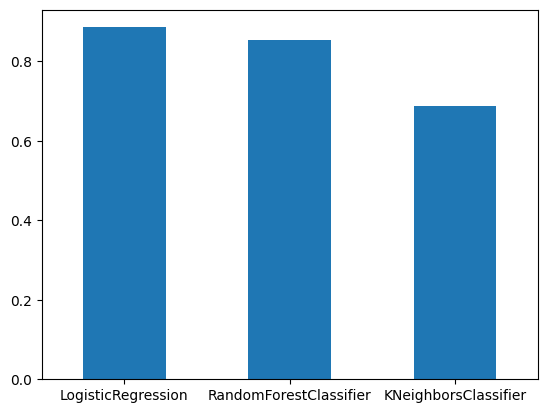

In [50]:
scores_df.Accuracy.plot.bar()
plt.xticks(rotation = 0);

Based on the baseline model, we try to improve the model

In [64]:
lr_grid = {'C' : np.logspace(-4, 4, 20),
           'solver' : ['liblinear']}

rf_grid = {'bootstrap': [True, False], 
           'max_depth': [None, 3, 5, 10],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 3, 5, 8, 10, 15, 20],
           'min_samples_split': [2, 4, 6, 8, 10, 15, 20],
           'n_estimators': [100, 200, 400, 500, 800, 1000]}

knn_grid = {'n_neighbors' : [3, 5, 7, 9, 11, 13],
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']}

In [65]:
lr_grid_model = GridSearchCV(estimator=LogisticRegression(), param_grid=lr_grid, cv=5, n_jobs=-1)
rf_grid_model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=rf_grid, cv = 5, n_jobs=-1)
knn_grid_model = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_grid, cv=5, n_jobs=-1)

In [66]:
grid_models = {"LogisticRegression" : lr_grid_model,
          "RandomForestClassifier" : rf_grid_model,
          "KNeighborsClassifier" : knn_grid_model}
grid_scores = fit_and_show_scores(grid_models, X_tr, y_tr, X_te, y_te)

Accuracy  (LogisticRegression): 0.8852459016393442
Precision (LogisticRegression): 0.8787878787878788
F1 Score  (LogisticRegression): 0.8923076923076922
Recall    (LogisticRegression): 0.90625

Accuracy  (RandomForestClassifier): 0.8688524590163934
Precision (RandomForestClassifier): 0.8529411764705882
F1 Score  (RandomForestClassifier): 0.8787878787878787
Recall    (RandomForestClassifier): 0.90625

Accuracy  (KNeighborsClassifier): 0.7049180327868853
Precision (KNeighborsClassifier): 0.7333333333333333
F1 Score  (KNeighborsClassifier): 0.7096774193548386
Recall    (KNeighborsClassifier): 0.6875



In [67]:
grid_scores_df = pd.DataFrame(grid_scores)
grid_scores_df = grid_scores_df.T
grid_scores_df

,Accuracy,Precision,F1 Score,Recall
LogisticRegression,0.885246,0.878788,0.892308,0.90625
RandomForestClassifier,0.868852,0.852941,0.878788,0.90625
KNeighborsClassifier,0.704918,0.733333,0.709677,0.68750


In [68]:
scores_df

,Accuracy,Precision,F1 Score,Recall
LogisticRegression,0.885246,0.878788,0.892308,0.90625
RandomForestClassifier,0.852459,0.848485,0.861538,0.87500
KNeighborsClassifier,0.688525,0.685714,0.716418,0.75000


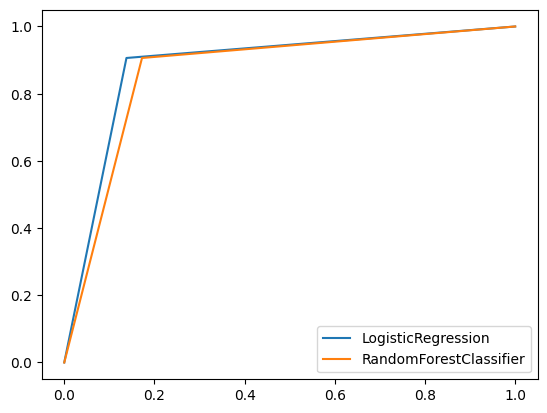

In [102]:
fpr, tpr, _ = roc_curve(y_te, lr_grid_model.predict(X_te))
plt.plot(fpr, tpr)
fpr, tpr, _ = roc_curve(y_te, rf_grid_model.predict(X_te))
plt.plot(fpr, tpr)
plt.legend(["LogisticRegression", "RandomForestClassifier"])